In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import importlib
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

sys.path.append(os.path.join(os.getcwd(), 'sunspots'))

# Import pyfrechet for metric spaces

# Clear any cached imports
if 'support_functions' in sys.modules:
    importlib.reload(sys.modules['support_functions'])

# Import the unified functions
from support_functions import (
    # Unified functions that take metric_space as parameter
    load_coverage_results,
    create_type_i_tables,
    create_type_ii_plots,
    create_type_iii_tables,
    create_type_iv_plots,
    create_radius_plots,
    calculate_mse_comparison,
    create_all_paper_plots,
    # Sunspot visualization functions
    create_sunspot_plots,
    # SPD Fréchet mean analysis functions
    create_spd_frechet_plots,
    # Spheroid visualization functions
    plot_all_configurations_parallel,
    # Sunspot boxplot functions
    load_sunspot_data, create_sunspot_boxplot,
    # SPD ball visualization functions
    create_spd_affine_invariant_ball, create_spd_log_euclidean_ball, create_spd_log_cholesky_ball,
    # Radius and volume analysis functions
    pb_radius_results, pb_vol_results, pb_all_results,
    conf_radius_results, conf_vol_results, conf_all_results,
    ratio_compare_radius_dimension, ratio_compare_volume_dimension,
    process_radius_volume_data,
    compute_summary,
    # Sunspot statistical table functions
    generate_statistical_latex_table, load_sunspot_hypothesis_results,
    # Sunspot spheroid balls visualization
    create_sunspot_spheroid_balls_plot
)

# Configure plotting
plt.style.use('default')  # Use default style to avoid version issues
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# Create output directory for results
output_dir = Path("results_plots")
output_dir.mkdir(exist_ok=True)

# Euclidean space results

## Euclidean Types I and III coverage results

In [2]:
# Load Euclidean results
euclidean_coverage_df = load_coverage_results('euclidean')

# Type I coverage tables
pb_euclidean, conf_euclidean = create_type_i_tables(euclidean_coverage_df, 'euclidean')

print("\n=== OOB prediction balls - Type I coverage (euclidean data) ===")
display(pb_euclidean)
latex_pb_euclidean_i = pb_euclidean.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:pbtypeIerrorcoverage')

print("\n=== Split-conformal - Type I coverage (euclidean data) ===")
display(conf_euclidean)
latex_conf_euclidean_i = conf_euclidean.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:conftypeIerrorcoverage')

# Type III coverage tables
pb_euclidean_iii, conf_euclidean_iii = create_type_iii_tables(euclidean_coverage_df, 'euclidean')
latex_pb_euclidean_iii = pb_euclidean_iii.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:pbtypeIIIerrorcoverage')

print("\n=== Prediction balls - Type III coverage (euclidean data) ===")
display(pb_euclidean_iii)
latex_conf_euclidean_iii = conf_euclidean_iii.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:conftypeIIIerrorcoverage')

print("\n=== Split-conformal - Type III coverage (euclidean data) ===")
display(conf_euclidean_iii)


=== OOB prediction balls - Type I coverage (euclidean data) ===


Significance Level                     0.01                     0.05  \
sigma N                                                                
0.9   50                        98.3 (0.39)              94.7 (0.71)   
      100           \underline{98.1} (0.43)              94.0 (0.76)   
      200                       98.2 (0.40)  \underline{93.1} (0.78)   
      500                       98.8 (0.34)              95.0 (0.65)   
1.7   50            \underline{97.4} (0.47)  \underline{93.3} (0.79)   
      100                       98.2 (0.43)              94.3 (0.75)   
      200                       98.6 (0.37)              94.5 (0.68)   
      500                       99.1 (0.37)              95.0 (0.74)   

Significance Level                      0.1  
sigma N                                      
0.9   50                        89.4 (1.02)  
      100                       89.8 (0.97)  
      200           \underline{87.5} (1.04)  
      500                       90.4 (0.92)  
1.7   50            \underline{87.6} (1.02)  
      100                       88.2 (1.00)  
      200                       90.1 (0.93)  
      500                       90.1 (0.90)


=== Split-conformal - Type I coverage (euclidean data) ===


Significance Level                     0.01                     0.05  \
sigma N                                                                
0.9   50            \underline{96.1} (0.58)              93.6 (0.80)   
      100           \underline{97.7} (0.45)              93.8 (0.73)   
      200           \underline{97.7} (0.46)              93.6 (0.77)   
      500                       98.7 (0.35)              95.4 (0.70)   
1.7   50            \underline{96.0} (0.60)  \underline{92.5} (0.85)   
      100           \underline{97.9} (0.41)              95.5 (0.72)   
      200                       98.4 (0.41)              94.6 (0.71)   
      500                       98.7 (0.37)              94.8 (0.73)   

Significance Level          0.1  
sigma N                          
0.9   50            90.0 (0.98)  
      100           88.7 (0.97)  
      200           88.4 (1.07)  
      500           89.4 (0.98)  
1.7   50            89.3 (1.03)  
      100           88.8 (1.01)  
      200           88.8 (0.95)  
      500           89.7 (0.95)


=== Prediction balls - Type III coverage (euclidean data) ===


Significance Level         0.01                     0.05  \
sigma N                                                    
0.9   50            99.1 (0.31)              96.2 (0.61)   
      100           98.8 (0.33)              95.0 (0.61)   
      200           98.6 (0.33)              95.0 (0.69)   
      500           99.4 (0.29)              95.4 (0.64)   
1.7   50            98.7 (0.39)              94.9 (0.69)   
      100           98.4 (0.42)              94.6 (0.69)   
      200           99.2 (0.30)  \underline{96.7} (0.63)   
      500           98.8 (0.37)              94.3 (0.71)   

Significance Level                      0.1  
sigma N                                      
0.9   50            \underline{91.8} (0.92)  
      100                       91.0 (0.86)  
      200                       91.0 (0.91)  
      500                       91.6 (0.95)  
1.7   50                        89.1 (0.97)  
      100                       89.8 (0.94)  
      200                       90.5 (0.95)  
      500                       90.5 (0.93)


=== Split-conformal - Type III coverage (euclidean data) ===


Significance Level                     0.01         0.05  \
sigma N                                                    
0.9   50                        98.3 (0.40)  95.1 (0.64)   
      100                       99.0 (0.30)  96.2 (0.56)   
      200                       99.0 (0.36)  95.3 (0.65)   
      500                       99.3 (0.31)  95.6 (0.64)   
1.7   50            \underline{97.0} (0.52)  93.7 (0.79)   
      100                       98.5 (0.39)  95.4 (0.66)   
      200                       99.0 (0.34)  95.5 (0.67)   
      500                       99.0 (0.35)  94.7 (0.67)   

Significance Level                      0.1  
sigma N                                      
0.9   50            \underline{92.8} (0.80)  
      100           \underline{91.8} (0.82)  
      200                       90.7 (0.90)  
      500                       90.3 (0.93)  
1.7   50                        91.0 (0.98)  
      100                       89.6 (0.97)  
      200                       90.8 (0.94)  
      500                       91.1 (0.90)

## Euclidean Types II and IV coverage analysis

=== Type II coverage plots ===
 Sigma = √3/2


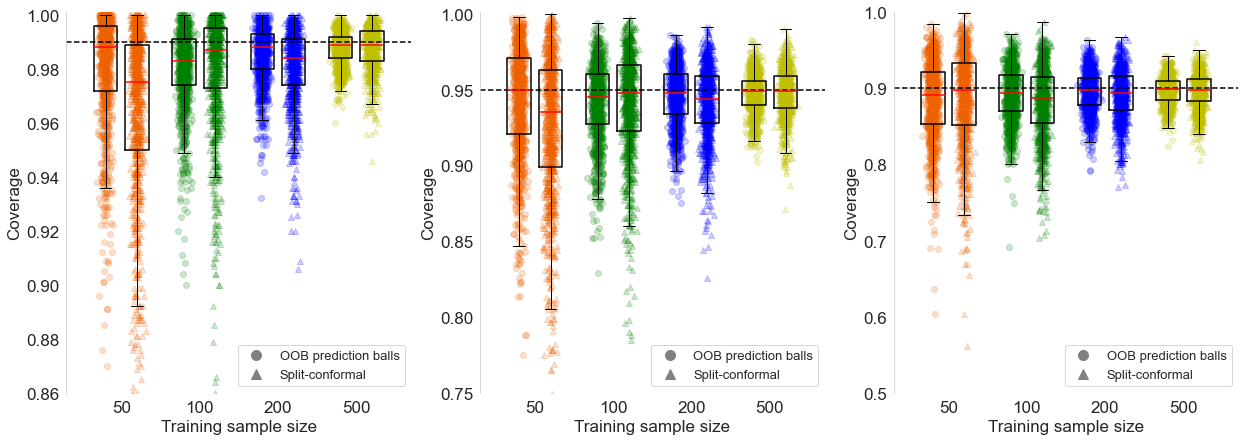

 Sigma = √3


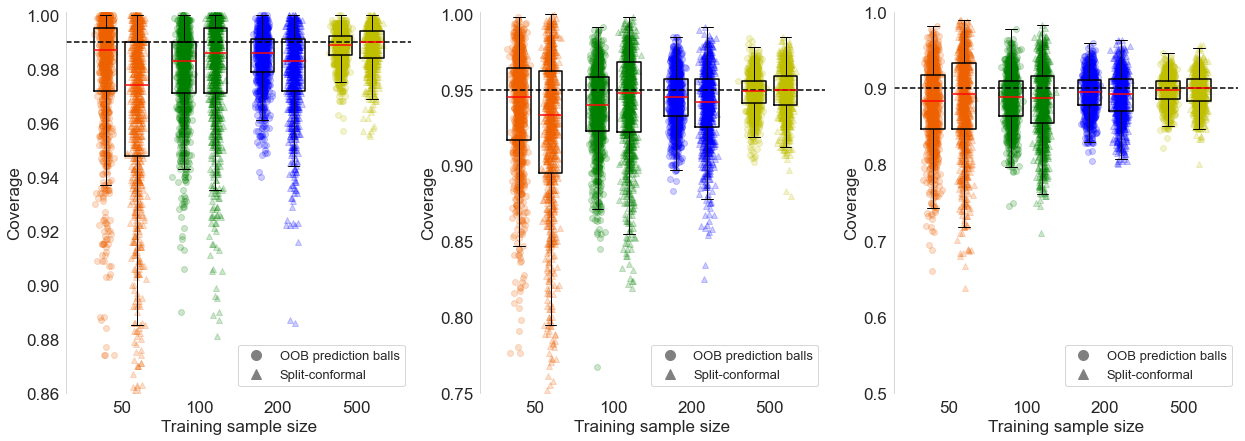


=== Type IV coverage plots ===
 Sigma = √3/2


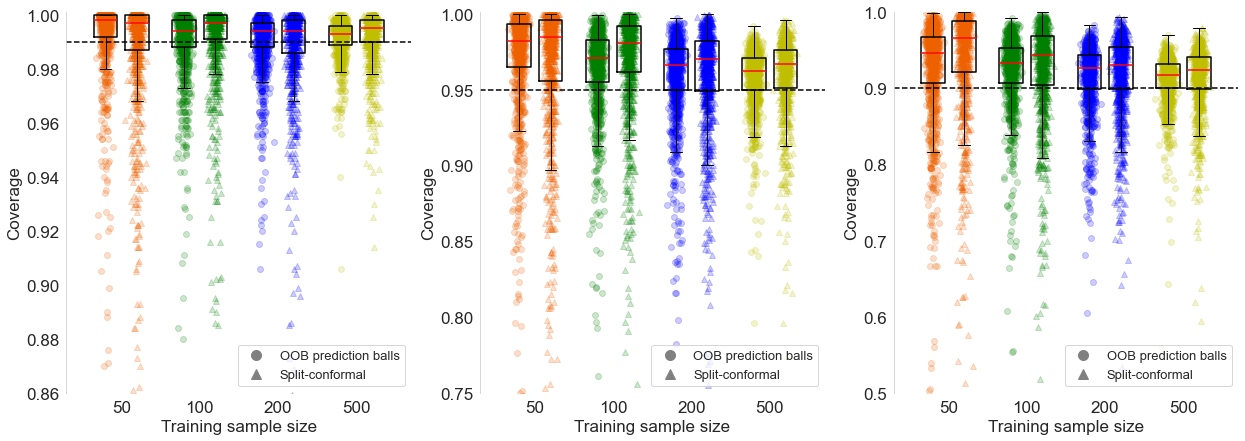

 Sigma = √3


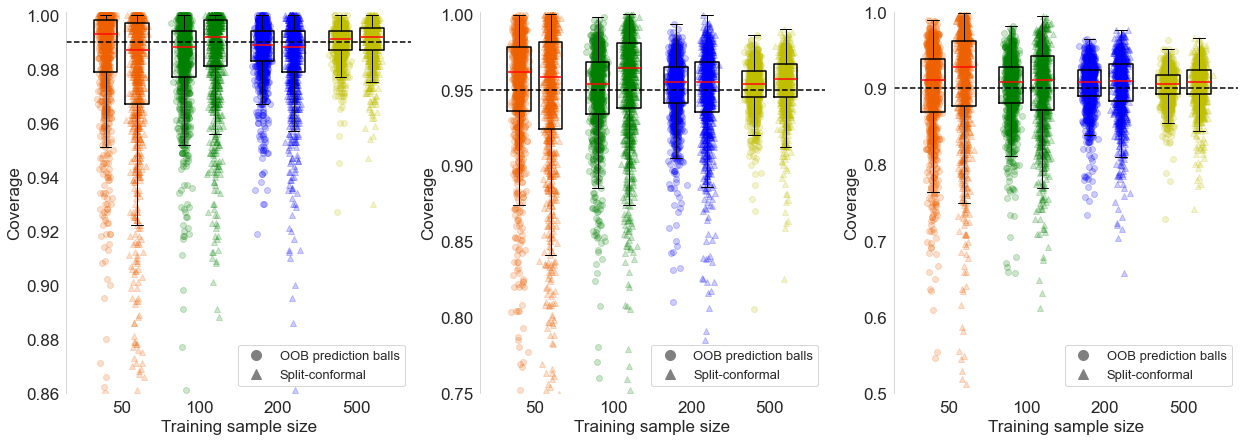

In [3]:
# Type II coverage plots
print("=== Type II coverage plots ===")
create_type_ii_plots(euclidean_coverage_df, 'euclidean')

# Type IV coverage plots
print("\n=== Type IV coverage plots ===")
create_type_iv_plots(euclidean_coverage_df, 'euclidean')

In [4]:
# MSE comparison
print("=== MSE comparison ===")
mse_comparison_euclidean = calculate_mse_comparison(euclidean_coverage_df, 'euclidean')
display(mse_comparison_euclidean)

=== MSE comparison ===


pb_mse         conf_mse  relative_improvement
train_size sigma                                                        
50         0.9    1.3608 ± 0.1730  1.7344 ± 0.3361             21.543967
100        0.9    1.1529 ± 0.1058  1.3772 ± 0.1845             16.292774
200        0.9    1.0243 ± 0.0672  1.1502 ± 0.1042             10.943316
500        0.9    0.9244 ± 0.0479  0.9971 ± 0.0598              7.289861
50         1.7    4.0158 ± 0.3631  4.5231 ± 0.6253             11.214908
100        1.7    3.6891 ± 0.2478  4.0089 ± 0.3872              7.978306
200        1.7    3.4756 ± 0.1894  3.6885 ± 0.2412              5.772351
500        1.7    3.2925 ± 0.1595  3.4276 ± 0.1784              3.942103

In [5]:
# Time cmparison
print("=== Time comparison ===")

# Compute summaries for both methods
euc_summary, conf_summary = compute_summary(euclidean_coverage_df)

# Get unique train sizes
train_sizes = sorted(set(euclidean_coverage_df["train_size"]) | set(euclidean_coverage_df["train_size"]))

# Construct DataFrame for LaTeX output
data = {
    size: [euc_summary.get(size, "-"), conf_summary.get(size, "-")] 
    for size in train_sizes
}
df_latex = pd.DataFrame(data, index=["Prediction Balls", "SC"])

# Generate LaTeX table
latex = df_latex.to_latex(
    index=True, column_format="l" + "c" * len(train_sizes),
    caption='Computation times for Prediction Balls and SC methods',
    label='tab:computation_times')

df_latex

=== Time comparison ===


50           100           200           500
Prediction Balls  9.37 (0.70)  9.64 (0.66)  10.06 (0.67)  10.75 (0.70)
SC                9.12 (0.82)  9.44 (0.71)   9.69 (0.69)  10.26 (0.64)

## Radius and volume of SC and OOB balls

=== Creating radius comparison plots ===


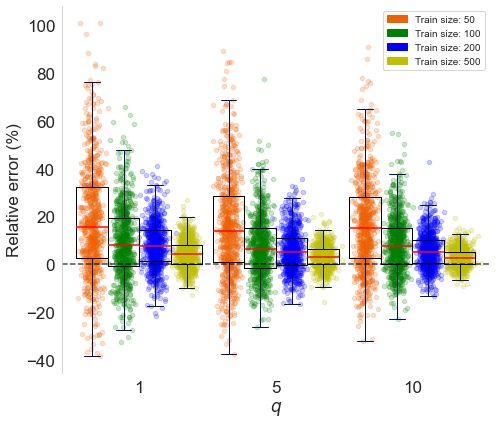


=== Creating volume comparison plots ===


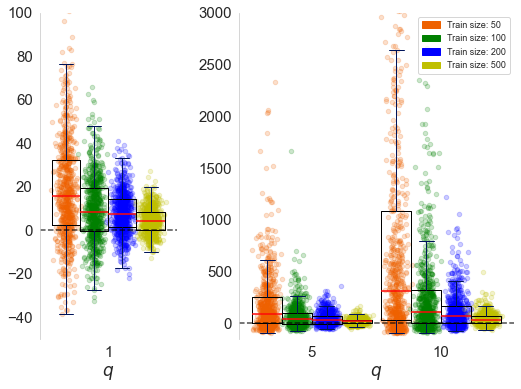

In [2]:
# Generate the ratio plots
save_path = os.path.join(os.getcwd(), 'results_plots')

# Generate plots for Radius ratios
print("=== Creating radius comparison plots ===")
ratio_compare_radius_dimension(save_path)

# Generate plots for volume ratios
print("\n=== Creating volume comparison plots ===")
ratio_compare_volume_dimension(save_path)

# Sphere results

## Types I and III coverages

In [7]:
sphere_coverage_df = load_coverage_results('sphere')

# Type I coverage table
sphere_df_i = create_type_i_tables(sphere_coverage_df, 'sphere')
latex_sphere_i = sphere_df_i.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:spheretypeIerrorcoverage')   

# Type III coverage analysis
sphere_df_iii = create_type_iii_tables(sphere_coverage_df, 'sphere')
latex_sphere_iii = sphere_df_iii.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:spheretypeIIIerrorcoverage')

print("\n=== OOB prediction balls - Type I coverage (sphere data) ===")
display(sphere_df_i)

print("\n=== OOB prediction balls - Type III coverage (sphere data) ===")
display(sphere_df_iii)


=== OOB prediction balls - Type I coverage (sphere data) ===


Significance Level                     0.01         0.05          0.1
kappa N                                                              
50    50            \underline{97.9} (0.40)  94.1 (0.73)  88.4 (1.00)
      100                       98.5 (0.41)  94.4 (0.74)  89.5 (0.97)
      200                       98.5 (0.37)  93.8 (0.78)  88.3 (0.98)
      500                       98.5 (0.37)  93.9 (0.72)  88.9 (0.99)
200   50                        98.8 (0.42)  95.3 (0.73)  89.4 (1.03)
      100                       98.2 (0.42)  93.6 (0.78)  89.0 (1.02)
      200                       98.7 (0.39)  94.0 (0.79)  88.3 (1.07)
      500                       98.4 (0.38)  95.2 (0.73)  90.7 (1.01)


=== OOB prediction balls - Type III coverage (sphere data) ===


Significance Level                      0.01                      0.05  \
kappa N                                                                  
50    50            \underline{100.0} (0.08)   \underline{98.6} (0.33)   
      100                        99.3 (0.28)               95.6 (0.66)   
      200                        99.3 (0.31)               95.0 (0.67)   
      500                        99.3 (0.30)   \underline{96.4} (0.63)   
200   50            \underline{100.0} (0.02)  \underline{100.0} (0.16)   
      100           \underline{100.0} (0.10)   \underline{98.8} (0.44)   
      200            \underline{99.7} (0.20)   \underline{96.9} (0.58)   
      500                        99.3 (0.33)               94.9 (0.70)   

Significance Level                      0.1  
kappa N                                      
50    50            \underline{94.4} (0.70)  
      100                       90.5 (0.89)  
      200                       90.0 (0.91)  
      500           \underline{92.1} (0.88)  
200   50            \underline{98.2} (0.45)  
      100           \underline{94.6} (0.71)  
      200           \underline{92.7} (0.83)  
      500                       91.1 (0.96)

## Sphere Types II and IV coverage analysis

=== Type II coverage (sphere) ===


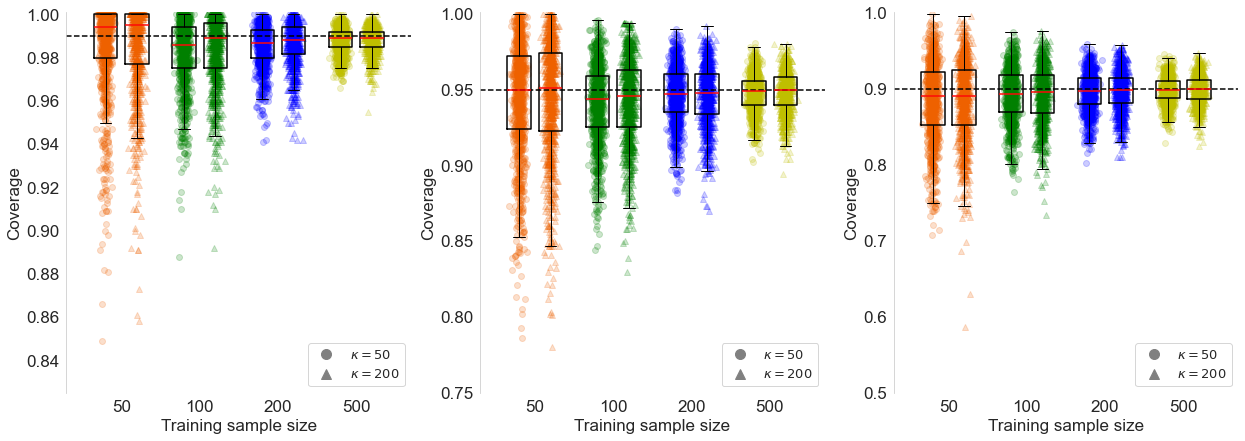


=== Type IV coverage (sphere) ===


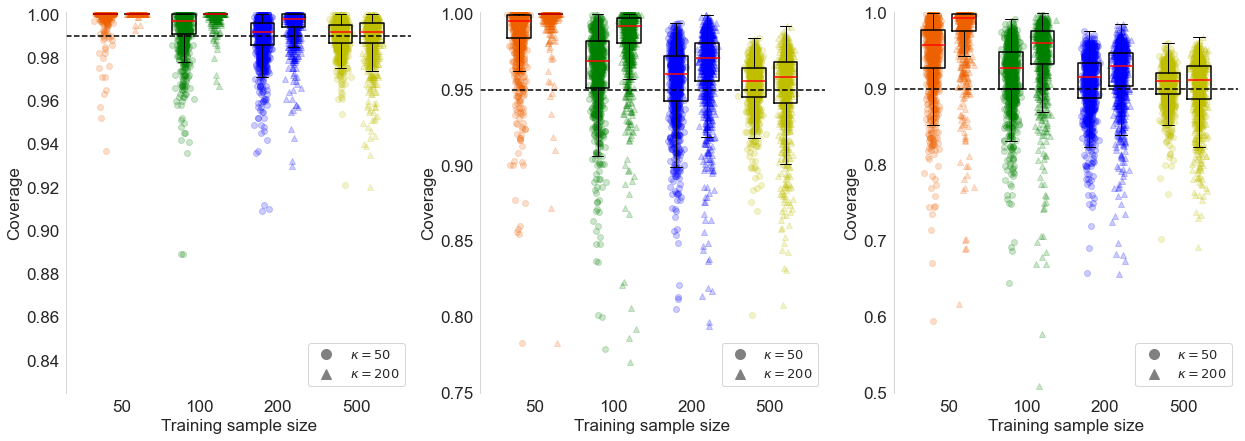

In [8]:
# Type II coverage plots
print("=== Type II coverage (sphere) ===")
create_type_ii_plots(sphere_coverage_df, 'sphere')

# Type IV coverage plots
print("\n=== Type IV coverage (sphere) ===")
create_type_iv_plots(sphere_coverage_df, 'sphere')

## Radius

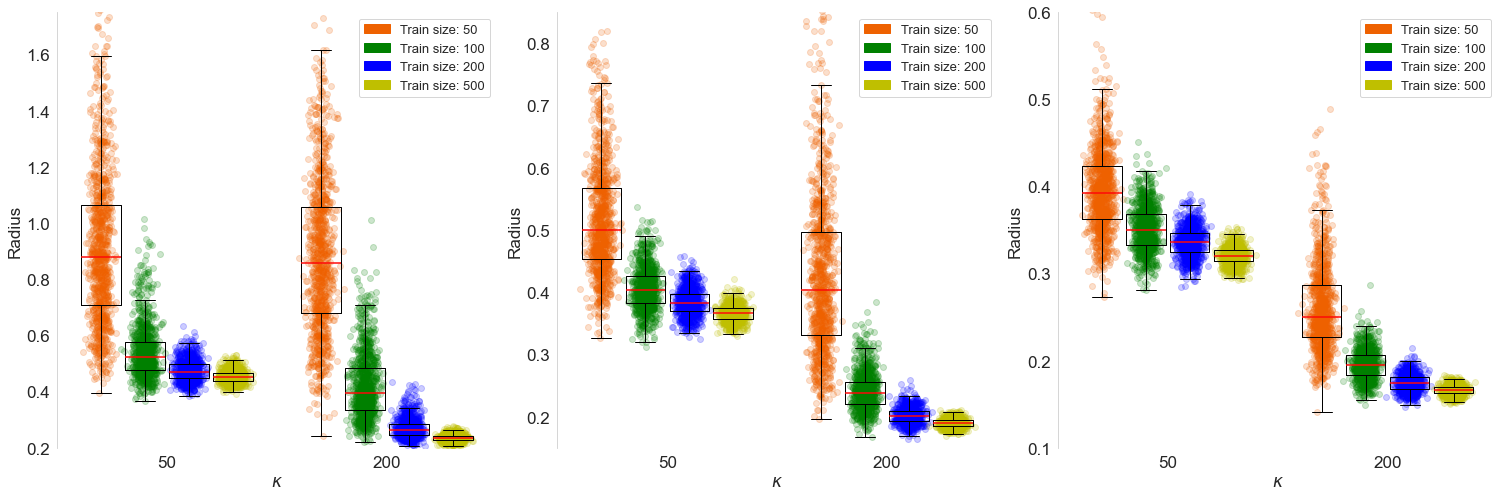

In [9]:
# Test the radius plots with the legend fix
create_radius_plots(sphere_coverage_df, 'sphere')

# Hyperboloid (H2) Results

## Types I and III coverages

In [10]:
hyperboloid_coverage_df = load_coverage_results('hyperboloid')
# Type I coverage table
hyperboloid_df_i = create_type_i_tables(hyperboloid_coverage_df, 'hyperboloid')
latex_hyperboloid_i = hyperboloid_df_i.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:hyperboloidtypeIerrorcoverage')   

# Type III coverage analysis
hyperboloid_df_iii = create_type_iii_tables(hyperboloid_coverage_df, 'hyperboloid')
latex_hyperboloid_iii = hyperboloid_df_iii.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:hyperboloidtypeIIIerrorcoverage')

print("\n=== OOB prediction balls - Type I coverage (hyperboloid data) ===")
display(hyperboloid_df_i)

print("\n=== OOB prediction balls - Type III coverage (hyperboloid data) ===")
display(hyperboloid_df_iii)


=== OOB prediction balls - Type I coverage (hyperboloid data) ===


Significance Level                     0.01                     0.05  \
kappa N                                                                
50    50            \underline{97.0} (0.48)  \underline{91.7} (0.80)   
      100           \underline{98.0} (0.48)              93.8 (0.74)   
      200                       98.4 (0.38)              94.2 (0.76)   
      500                       98.7 (0.38)              94.0 (0.71)   
200   50            \underline{97.9} (0.47)              94.4 (0.75)   
      100           \underline{97.8} (0.46)  \underline{92.7} (0.74)   
      200                       98.8 (0.38)  \underline{92.6} (0.72)   
      500                       98.8 (0.35)              95.8 (0.67)   

Significance Level                      0.1  
kappa N                                      
50    50            \underline{85.1} (1.10)  
      100                       88.0 (0.96)  
      200                       88.7 (0.98)  
      500                       90.6 (0.90)  
200   50                        90.1 (1.03)  
      100           \underline{87.9} (0.98)  
      200           \underline{87.9} (1.03)  
      500                       91.1 (0.92)


=== OOB prediction balls - Type III coverage (hyperboloid data) ===


Significance Level                     0.01                     0.05  \
kappa N                                                                
50    50                        98.6 (0.33)  \underline{96.3} (0.63)   
      100           \underline{98.1} (0.43)              94.6 (0.70)   
      200           \underline{98.1} (0.44)              94.9 (0.73)   
      500                       98.5 (0.37)              94.3 (0.71)   
200   50            \underline{99.7} (0.26)  \underline{97.2} (0.55)   
      100                       98.5 (0.35)              94.4 (0.69)   
      200                       99.2 (0.28)              95.1 (0.66)   
      500                       99.2 (0.28)              94.3 (0.72)   

Significance Level                      0.1  
kappa N                                      
50    50                        91.7 (0.90)  
      100                       89.3 (0.99)  
      200                       90.1 (0.96)  
      500                       88.7 (0.98)  
200   50            \underline{92.1} (0.87)  
      100                       88.5 (0.99)  
      200                       90.0 (0.93)  
      500                       89.2 (0.99)

## Hyperboloid Types II and IV coverage

=== Type II coverage plots (hyperboloid) ===


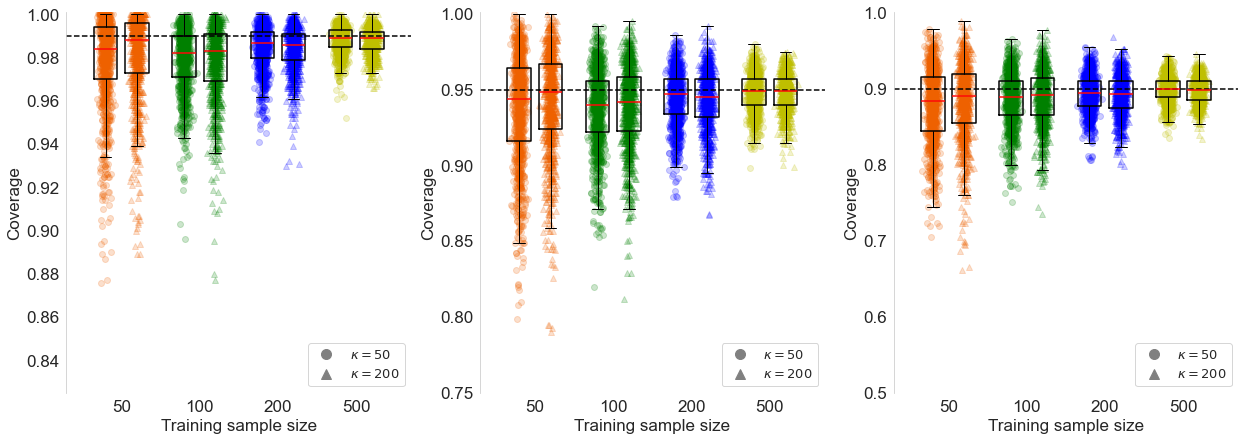


=== Type IV coverage plots (hyperboloid) ===


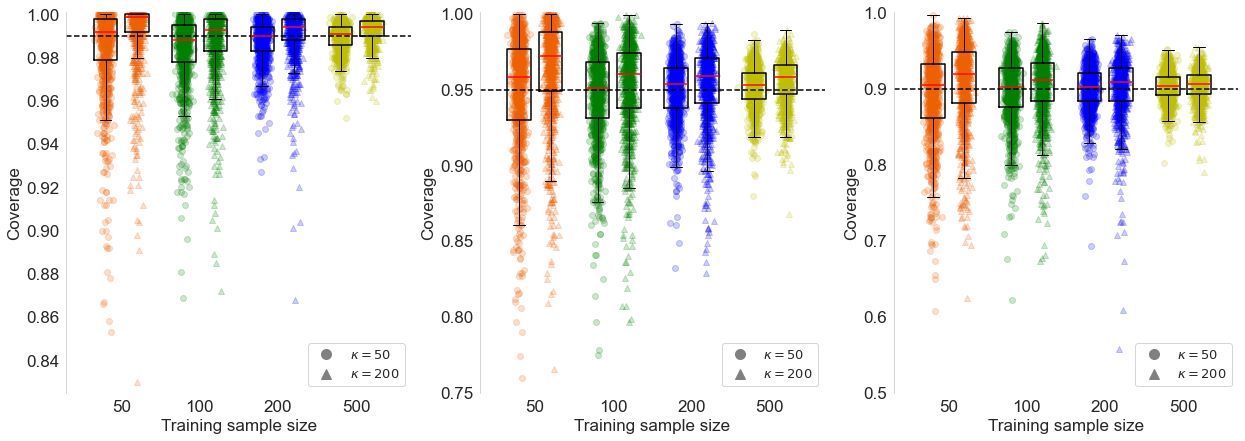

In [11]:
# Type II coverage plots
print("=== Type II coverage plots (hyperboloid) ===")
create_type_ii_plots(hyperboloid_coverage_df, 'hyperboloid')

# Type IV coverage plots
print("\n=== Type IV coverage plots (hyperboloid) ===")
create_type_iv_plots(hyperboloid_coverage_df, 'hyperboloid')

## Radius analysis

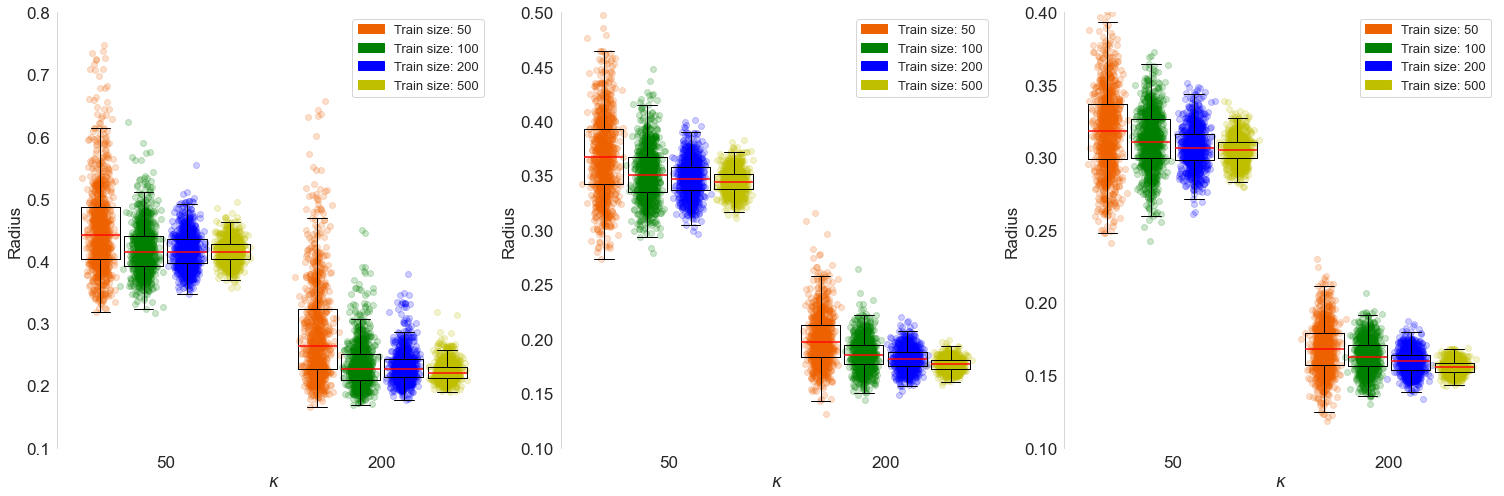

In [12]:
create_radius_plots(hyperboloid_coverage_df, 'hyperboloid')

# 4. SPD Manifolds Results 

## SPD Types I and III coverage analysis

In [13]:
spd_coverage_df = load_coverage_results('spd')
# Type I coverage tables
print("=== Type I coverage analysis (SPD) ===")
ai_i_df, le_i_df, lc_i_df = create_type_i_tables(spd_coverage_df, 'spd')

ai_latex_i = ai_i_df.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:spdtypeIerrorcoverage')
le_latex_i = le_i_df.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:ledtypeIerrorcoverage')
lc_latex_i = lc_i_df.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:lctypeIerrorcoverage')

print("\n=== Affine-invariant - Type I coverage (SPD) ===")
display(ai_i_df)

print("\n=== Log-Euclidean - Type I coverage (SPD) ===")
display(le_i_df)

print("\n=== Log-Cholesky - Type I coverage (SPD) ===")
display(lc_i_df)

# Type III coverage analysis
print("\n=== Type III coverage analysis (SPD) ===")
ai_iii_spd, le_iii_spd, lc_iii_spd = create_type_iii_tables(spd_coverage_df, 'spd')

ai_latex_iii = ai_iii_spd.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:spdtypeIIIerrorcoverage')
le_latex_iii = le_iii_spd.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:ledtypeIIIerrorcoverage')
lc_latex_iii = lc_iii_spd.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:lctypeIIIerrorcoverage')


print("\n=== Affine-invariant - Type III coverage (SPD) ===")
display(ai_iii_spd)

print("\n=== Log-Euclidean - Type III coverage (SPD) ===")
display(le_iii_spd)

print("\n=== Log-Cholesky - Type III coverage (SPD) ===")
display(lc_iii_spd)

=== Type I coverage analysis (SPD) ===

=== Affine-invariant - Type I coverage (SPD) ===


Significance Level                     0.01                     0.05  \
d  N                                                                   
5  50               \underline{97.2} (0.51)  \underline{92.8} (0.81)   
   100              \underline{97.8} (0.48)  \underline{93.2} (0.76)   
   200                          99.3 (0.36)              94.1 (0.69)   
   500              \underline{97.9} (0.40)              93.7 (0.75)   
15 50                           98.9 (0.39)              96.2 (0.75)   
   100                          98.4 (0.40)              94.9 (0.68)   
   200                          98.8 (0.38)              95.0 (0.70)   
   500                          98.8 (0.29)              95.0 (0.67)   

Significance Level                      0.1  
d  N                                         
5  50               \underline{86.1} (1.10)  
   100                          89.1 (1.01)  
   200                          88.5 (0.95)  
   500                          88.3 (1.01)  
15 50                           90.2 (0.97)  
   100                          91.1 (0.92)  
   200              \underline{92.1} (0.94)  
   500                          90.0 (0.89)


=== Log-Euclidean - Type I coverage (SPD) ===


Significance Level                     0.01                     0.05  \
d  N                                                                   
5  50               \underline{97.4} (0.49)  \underline{92.7} (0.81)   
   100              \underline{97.8} (0.48)              93.7 (0.76)   
   200                          99.1 (0.36)              94.2 (0.68)   
   500              \underline{97.8} (0.41)              93.5 (0.76)   
15 50                           98.8 (0.40)              95.9 (0.74)   
   100                          98.4 (0.40)              94.9 (0.71)   
   200                          98.9 (0.36)              95.3 (0.69)   
   500                          98.8 (0.29)              95.0 (0.67)   

Significance Level                      0.1  
d  N                                         
5  50               \underline{85.6} (1.11)  
   100                          89.6 (1.02)  
   200                          89.0 (0.96)  
   500                          88.4 (1.00)  
15 50                           89.8 (0.98)  
   100                          91.3 (0.92)  
   200                          91.5 (0.92)  
   500                          89.9 (0.88)


=== Log-Cholesky - Type I coverage (SPD) ===


Significance Level                     0.01                     0.05  \
d  N                                                                   
5  50               \underline{96.9} (0.52)  \underline{91.5} (0.84)   
   100              \underline{97.5} (0.48)  \underline{92.9} (0.78)   
   200                          98.6 (0.32)              95.3 (0.65)   
   500                          98.2 (0.42)              93.8 (0.76)   
15 50                           98.9 (0.41)              95.7 (0.75)   
   100                          98.5 (0.37)              95.5 (0.70)   
   200                          98.5 (0.39)              94.9 (0.69)   
   500                          98.8 (0.34)              95.2 (0.66)   

Significance Level                      0.1  
d  N                                         
5  50               \underline{85.9} (1.05)  
   100              \underline{87.5} (1.01)  
   200                          90.8 (0.91)  
   500                          88.8 (0.94)  
15 50                           89.8 (1.01)  
   100                          91.6 (0.92)  
   200                          90.0 (0.93)  
   500                          89.4 (0.98)


=== Type III coverage analysis (SPD) ===

=== Affine-invariant - Type III coverage (SPD) ===


Significance Level                     0.01                     0.05  \
d  N                                                                   
5  50                           98.2 (0.38)              94.6 (0.71)   
   100                          98.6 (0.42)              94.6 (0.72)   
   200              \underline{97.8} (0.42)              94.7 (0.83)   
   500                          99.2 (0.30)              96.2 (0.64)   
15 50                           99.3 (0.26)  \underline{96.8} (0.56)   
   100                          98.4 (0.33)              95.9 (0.61)   
   200                          98.9 (0.29)              96.1 (0.63)   
   500                          99.2 (0.25)              96.1 (0.62)   

Significance Level                      0.1  
d  N                                         
5  50                           89.5 (0.99)  
   100                          90.1 (0.93)  
   200                          88.6 (1.03)  
   500                          91.7 (0.93)  
15 50               \underline{92.7} (0.83)  
   100              \underline{91.9} (0.85)  
   200              \underline{92.0} (0.86)  
   500                          91.7 (0.88)


=== Log-Euclidean - Type III coverage (SPD) ===


Significance Level                     0.01                     0.05  \
d  N                                                                   
5  50                           98.3 (0.38)              94.9 (0.72)   
   100                          98.5 (0.43)              94.8 (0.72)   
   200              \underline{97.8} (0.43)              94.0 (0.83)   
   500                          99.3 (0.31)              96.1 (0.66)   
15 50                           99.4 (0.26)  \underline{96.7} (0.56)   
   100                          98.5 (0.33)              95.6 (0.62)   
   200                          98.8 (0.31)              95.8 (0.64)   
   500                          99.1 (0.26)              95.7 (0.64)   

Significance Level                      0.1  
d  N                                         
5  50                           89.5 (1.02)  
   100                          89.6 (0.94)  
   200                          89.0 (1.02)  
   500                          90.9 (0.96)  
15 50               \underline{92.3} (0.83)  
   100                          91.6 (0.88)  
   200              \underline{91.8} (0.87)  
   500                          91.4 (0.89)


=== Log-Cholesky - Type III coverage (SPD) ===


Significance Level                     0.01                     0.05  \
d  N                                                                   
5  50                           98.4 (0.42)              94.4 (0.73)   
   100              \underline{97.8} (0.45)  \underline{93.4} (0.79)   
   200              \underline{98.1} (0.41)  \underline{93.3} (0.75)   
   500                          98.8 (0.35)              95.9 (0.66)   
15 50               \underline{99.6} (0.20)  \underline{98.0} (0.47)   
   100                          98.7 (0.33)              95.8 (0.64)   
   200                          99.2 (0.30)  \underline{96.5} (0.62)   
   500                          99.4 (0.26)              95.8 (0.62)   

Significance Level                      0.1  
d  N                                         
5  50               \underline{87.7} (1.03)  
   100              \underline{87.6} (1.05)  
   200              \underline{87.3} (1.04)  
   500              \underline{91.8} (0.89)  
15 50               \underline{93.1} (0.76)  
   100                          90.6 (0.91)  
   200              \underline{91.8} (0.84)  
   500                          89.9 (0.85)

## SPD Types II and IV coverage analysis

=== Type II coverage plots (SPD) ===

 Affine-invariant metric


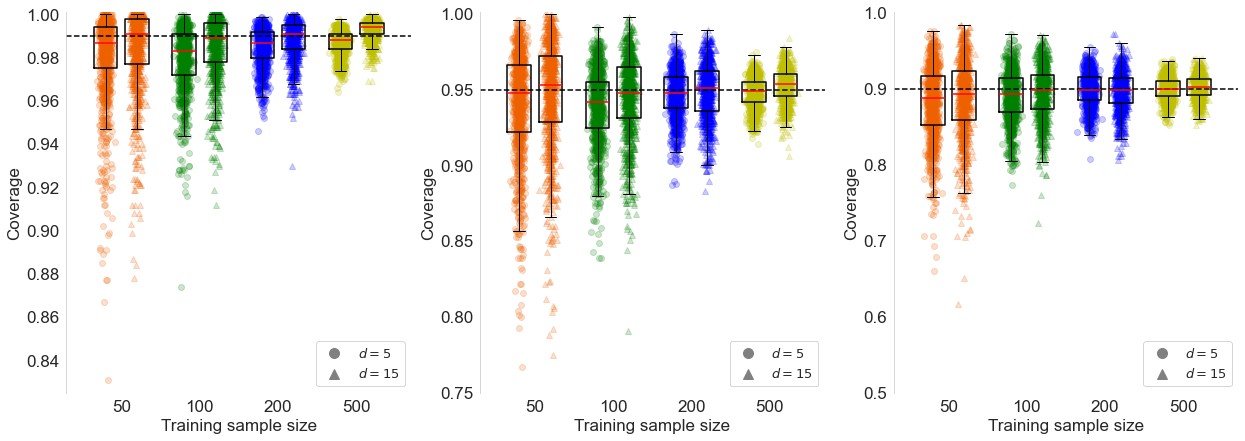


 Log-Cholesky metric


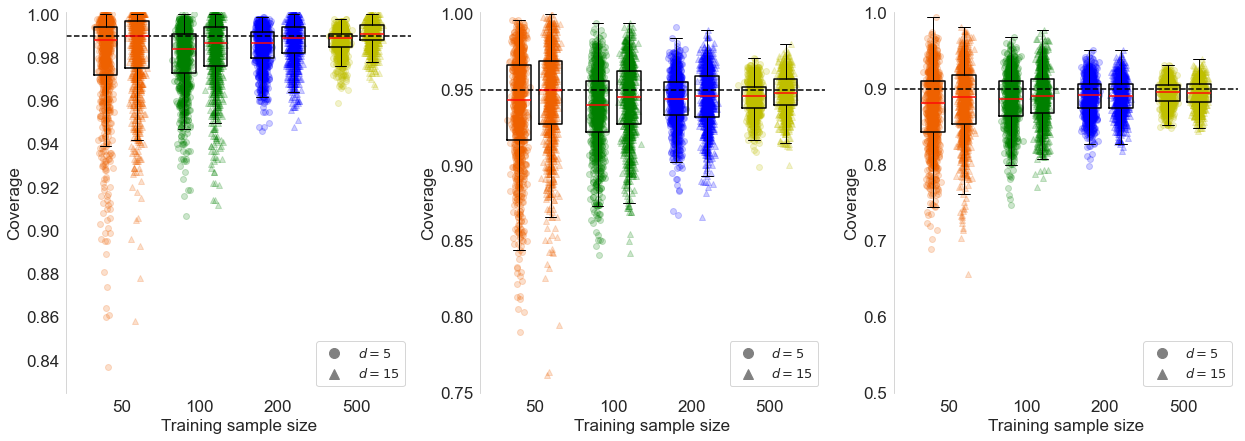


 Log-Euclidean metric


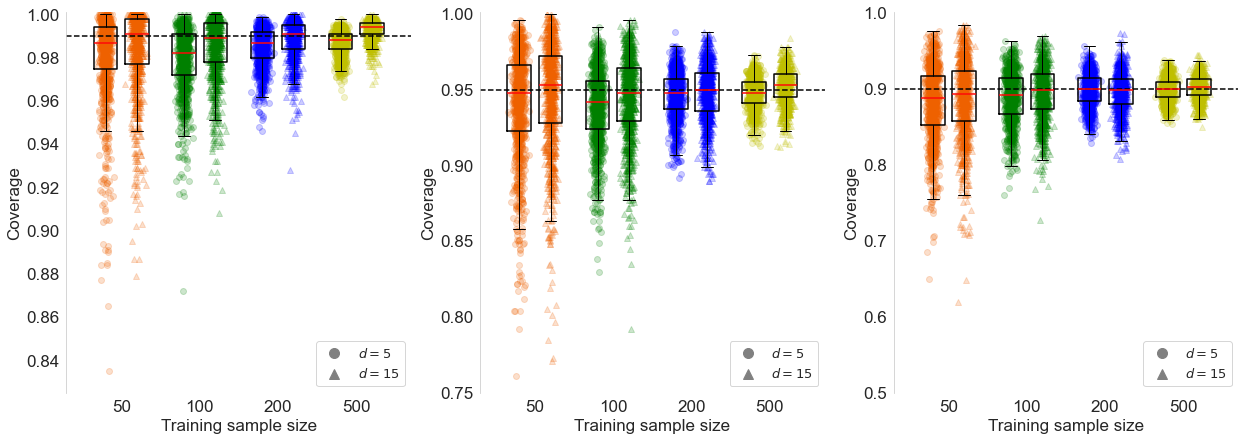


=== Type IV coverage plots (SPD) ===

 Affine-invariant metric


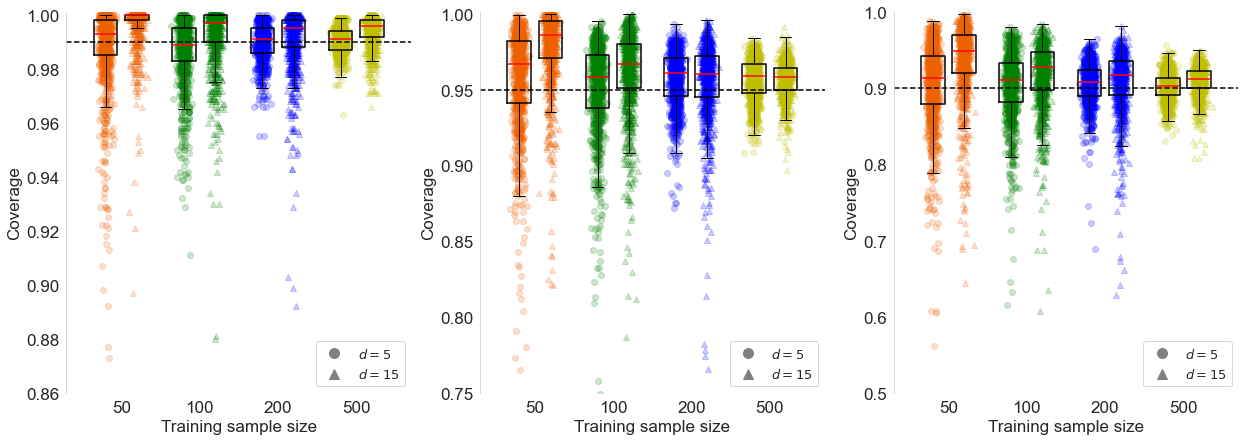


 Log-Cholesky metric


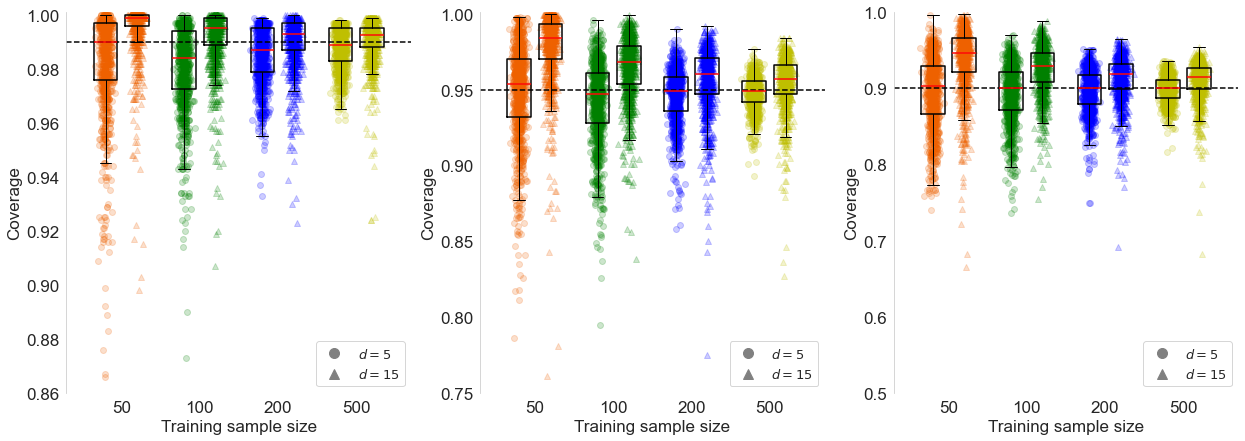


 Log-Cholesky metric


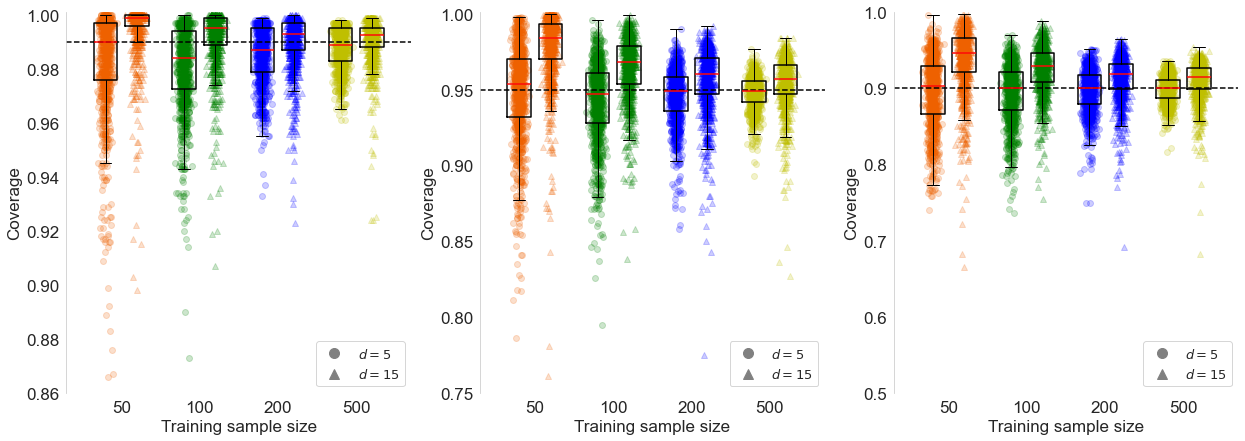


 Log-Euclidean metric


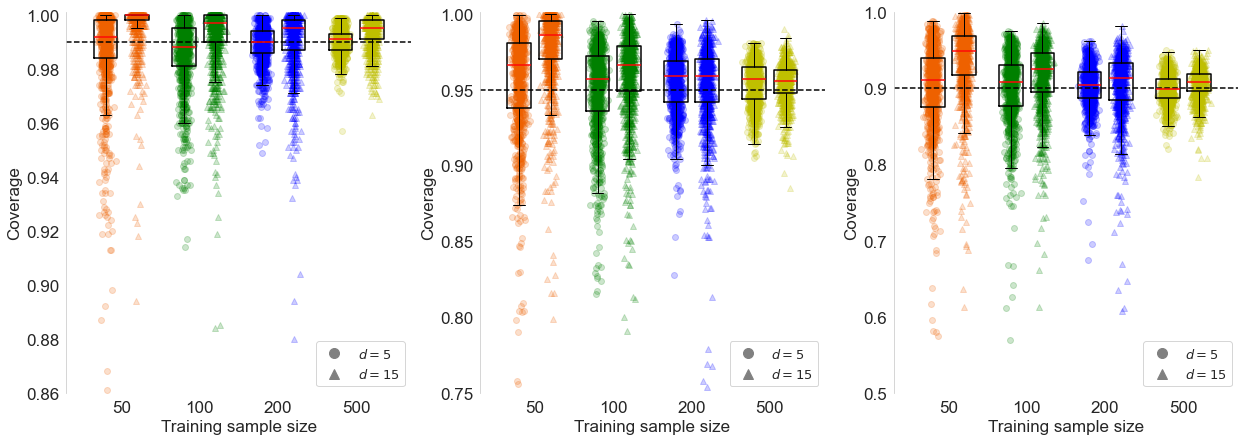

In [14]:
# Type II coverage plots
print("=== Type II coverage plots (SPD) ===")
create_type_ii_plots(spd_coverage_df, 'spd')

# Type IV coverage plots
print("\n=== Type IV coverage plots (SPD) ===")
create_type_iv_plots(spd_coverage_df, 'spd')

## Radius analysis

=== SPD Radius Analysis ===

AI metric


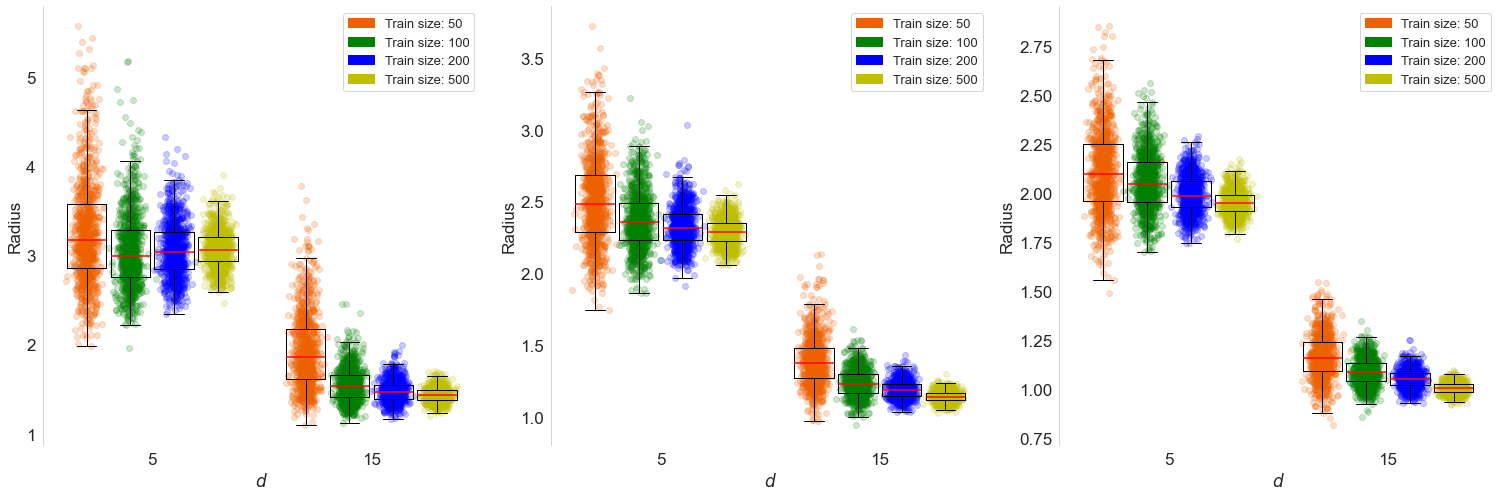


LE metric


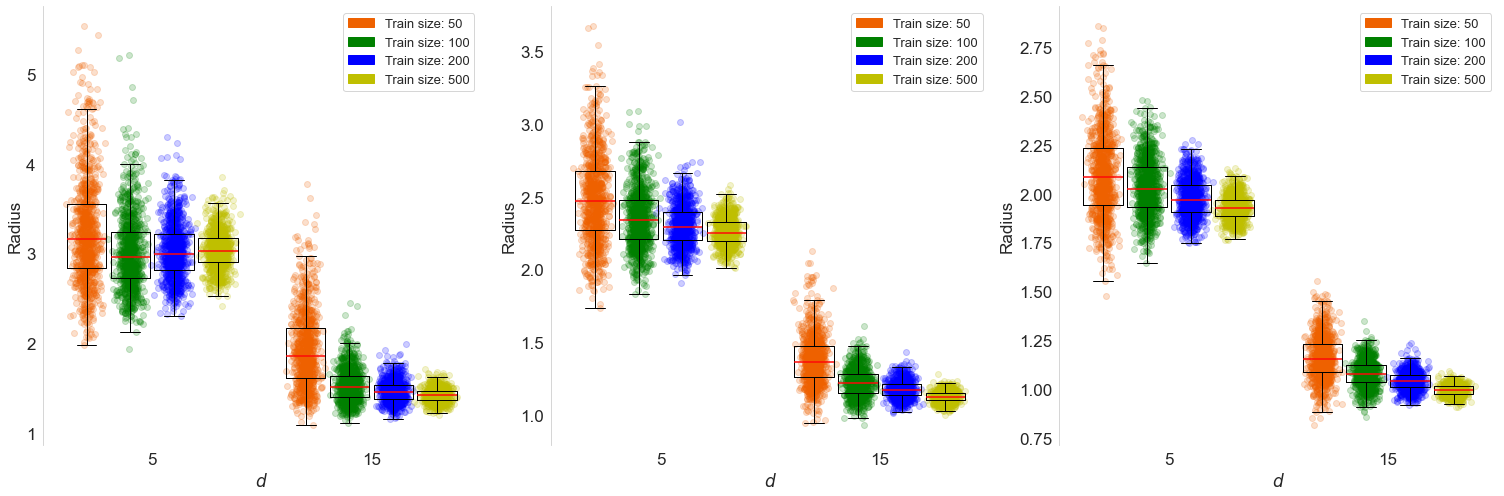


LC metric


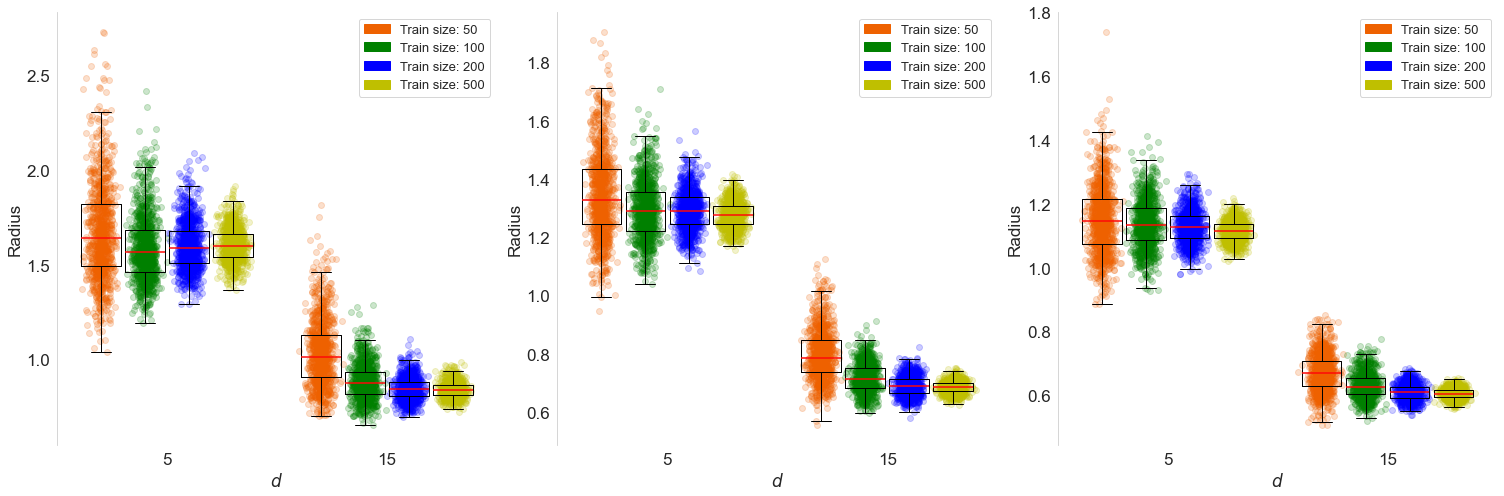

In [15]:
# spd_coverage_df = load_coverage_results('spd')
create_radius_plots(spd_coverage_df, 'spd')

# Sunspots

=== Creating sunspot true trajectories plot ===


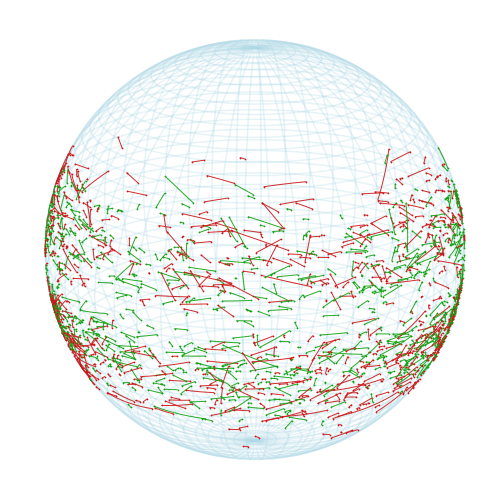


=== Creating sunspot predicted trajectories plot ===


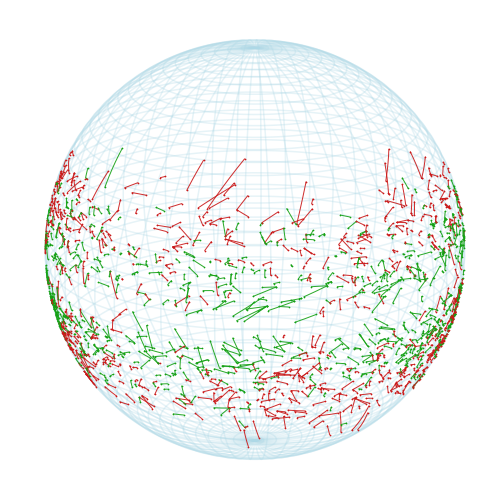


=== Creating sunspot prediction balls plot ===


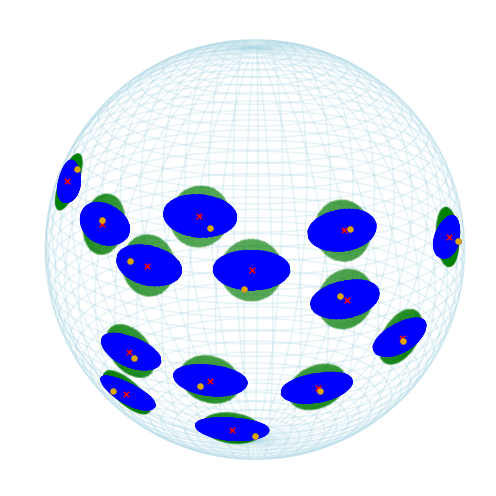

In [16]:
# Create sunspot trajectory visualizations
create_sunspot_plots()

### Table for MSE's, areas and coverages

In [2]:
# Load the combined hypothesis testing results
combined_results = load_sunspot_hypothesis_results('sunspots/results/combined_hypothesis_results.npy')

# Generate statistical LaTeX table if results are loaded
if combined_results is not None:
    generate_statistical_latex_table(combined_results)
else:
    print("Combined results not loaded. Please run the previous cell first.")

\begin{table}[hpbt]
\setlength{\tabcolsep}{1.5pt}
\centering
\begin{tabular}{lccccccccc|c|ccc}
\toprule
\multicolumn{1}{c}{} & \multicolumn{9}{c}{Oblate ($S_{1, \lambda}$)} &  \multicolumn{1}{c}{Sphere} & \multicolumn{3}{c}{Prolate ($S_{\lambda, 1}$)} \\
 \cmidrule(lr){2-10} \cmidrule(lr){11-11}  \cmidrule(lr){12-14}
\multicolumn{1}{c}{$\lambda$} & $0.1$ & $0.2$ & $0.3$ & $0.4$ & $\mathbf{0.5}$ & $0.6$ & $0.7$ & $0.8$ & $0.9$ & $1.0$ & $1.1$ & $1.25$ & $1.5$ \\
\midrule
$\Delta_{\mathrm{MSE}}$ & $27.2$ & $11.2$ & $4.0$ & $2.3$ & $1.1$ & $0.7$ & $0.4$ & $0.2$ & $0.2$ & $0.0$ & $0.2$ & $0.6$ & $0.8$ \\
$\Delta_{\mathrm{area}}$ & $109.6$ & $18.9$ & $-6.5$ & $-15.3$ & $\mathbf{-19.1}$ & $-17.7$ & $-15.1$ & $-10.7$ & $-5.1$ & $0.0$ & $4.1$ & $12.2$ & $24.6$ \\
Coverage & $89.5$ & $89.5$ & $89.5$ & $89.5$ & $89.5$ & $89.5$ & $89.5$ & $89.5$ & $89.5$ & $89.3$ & $89.5$ & $89.5$ & $89.5$ \\
$p_{\mathrm{MSE}}$ & $0.0$ & $0.0$ & $5 \\cdot 10^{-3}$ & $0.13$ & $0.47$ & $0.78$ & $0.91$ & $1.00$ & $1

### Boxplots: Type II coverages and areas

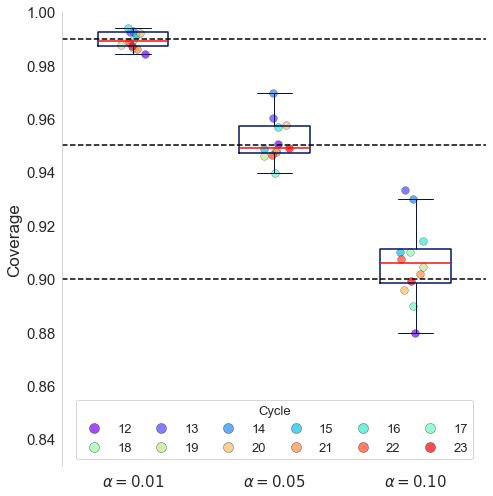

In [18]:
# Load sunspot data for cycles 12-23
data_dict = load_sunspot_data(cycle_range=(12, 24), results_dir="sunspots/results")

# Create coverage boxplot
coverage_fig = create_sunspot_boxplot(
    data_dict, 
    metric='coverage', 
    save_filename='sunspots_ii_cov.png',
    cycle_range=(12, 24),
    alphas=[0.1, 0.05, 0.01]
)

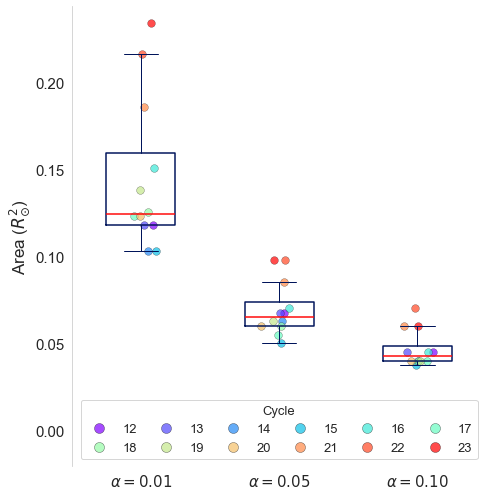

In [19]:
# Create area boxplot
area_fig = create_sunspot_boxplot(
    data_dict, 
    metric='area', 
    save_filename='sunspots_area.png',
    cycle_range=(12, 24),
    alphas=[0.1, 0.05, 0.01]
)

### Visualization of OOB prediction balls on the spheroid and on the sphere

The images are saved into `results_plots/` after running the following cell:

In [20]:
# Define configurations and run parallel processing
configurations = [
    (1.0, 1/3),
    (1.0, 2/3),
    (1, 1),
    (0.75, 1.0),
    (0.5, 1.0),
    (0.25, 1.0)
]

# Run parallel processing to create spheroid visualizations
results = plot_all_configurations_parallel(configurations)
for result in results:
    print(result)

Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Figure(700x700)
Completed processing a=1.0, c=0.3333333333333333
Completed processing a=1.0, c=0.6666666666666666
Completed processing a=1, c=1
Completed processing a=0.75, c=1.0
Completed processing a=0.5, c=1.0
Completed processing a=0.25, c=1.0


# Other plots from the paper

=== Creating hyperboloid visualization ===


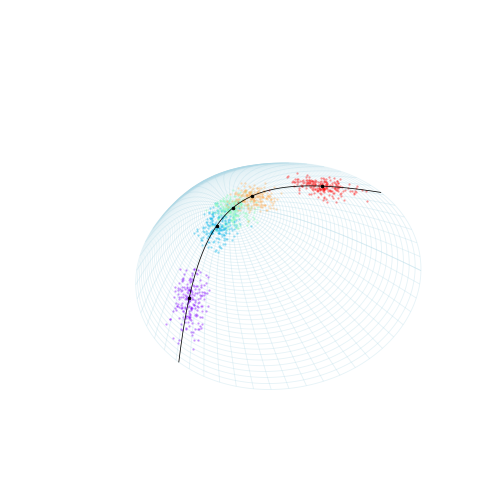


=== Creating sphere visualization ===


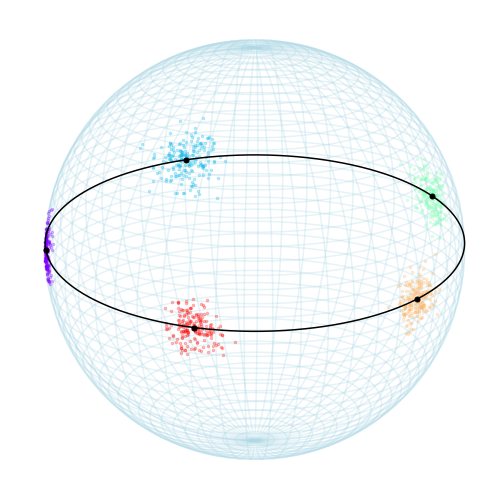


=== Creating SPD interpolation plot ===


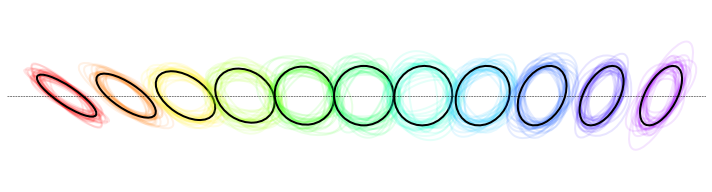


=== Creating sphere prediction balls ===


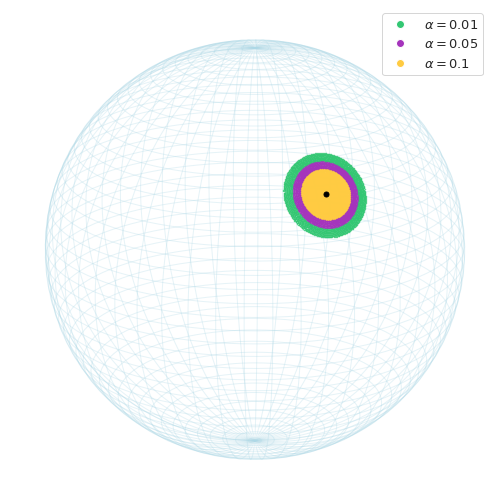


=== Creating hyperboloid prediction balls ===


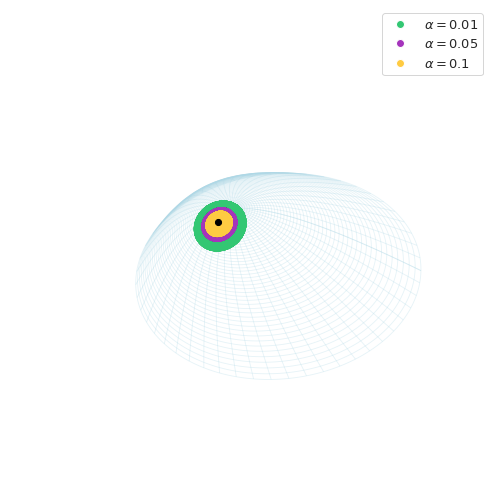


=== Creating SPD ball visualizations ===
OOB prediction ball visualization using affine-invariant metric...


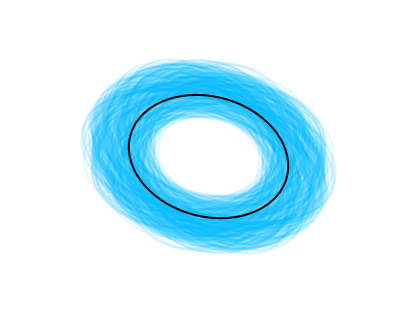

OOB prediction ball visualization using log-euclidean metric...


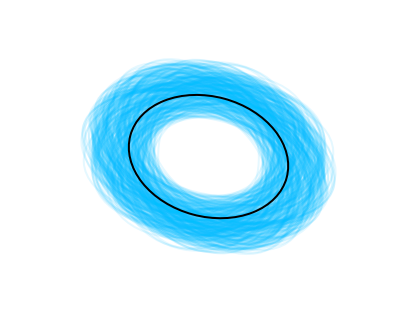

OOB prediction ball visualization using log-Cholesky metric...


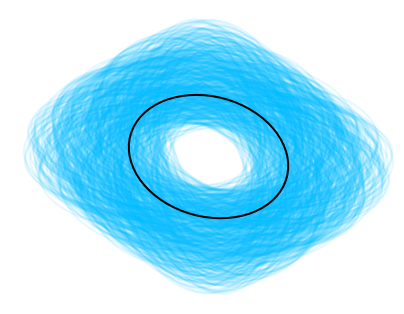

In [2]:
# 1. Hyperboloid visualization with regression curve and data points
# 2. Sphere visualization with regression curve and data points  
# 3. SPD matrices interpolation plot
# 4. Population prediction balls for sphere
# 5. Population prediction balls for hyperboloid

create_all_paper_plots()

# Fréchet means in the space of SPD matrices, for different metrics


--- Plot 1: d=15, q=2, different sigmas ---


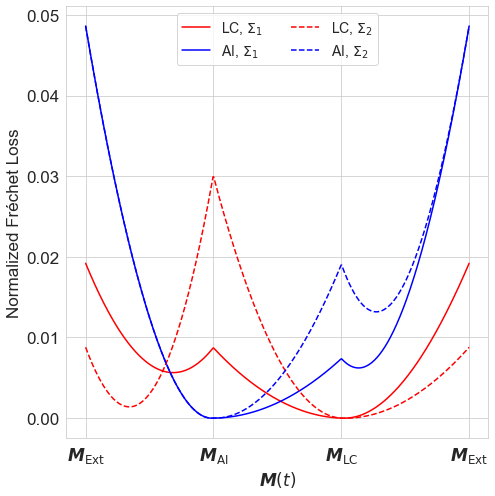


--- Plot 2: d=15, q=6, different sigmas ---


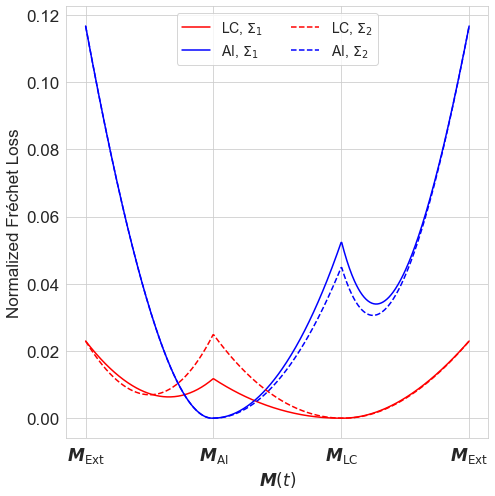


--- Plot 3: q=6, one sigma, different d values ---


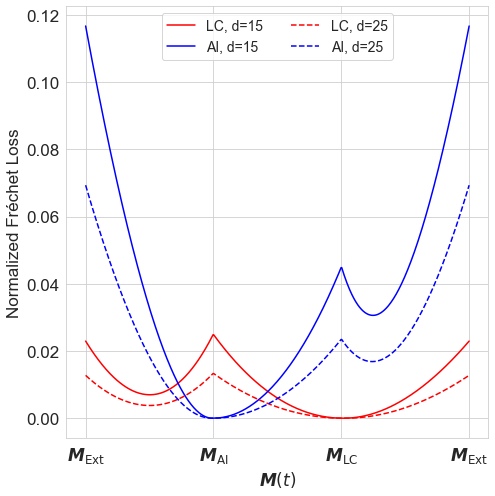

(<Figure size 504x504 with 1 Axes>,
 <Figure size 504x504 with 1 Axes>,
 <Figure size 504x504 with 1 Axes>)

In [22]:
# Generate the three SPD Fréchet mean analysis plots
# These plots compare log-Cholesky (LC) and affine-invariant (AI) metrics
# across different degrees of freedom and matrix dimensions
create_spd_frechet_plots()